In [15]:
#!/usr/bin/env python3
import torch
from torch.utils.data import Dataset, DataLoader

import polars as pl
from pathlib import Path

dataset_location = Path("../data/prepared/tokenized_data.csv")


option = dict()
option["data_train"] = 0.6
option["data_test"] = 0.4

class FlawsCloudtrail(Dataset):
    def __init__(self) -> None:
        super().__init__()
        assert dataset_location.exists()

        df = pl.read_csv(dataset_location)
        print(df.shape)
        self.df = torch.tensor(df.to_numpy())
        print(self.df.shape)
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        return self.df[index]


In [16]:
train_data = FlawsCloudtrail()
test_data = FlawsCloudtrail()
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

(1939206, 7)
torch.Size([1939206, 7])
(1939206, 7)
torch.Size([1939206, 7])


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

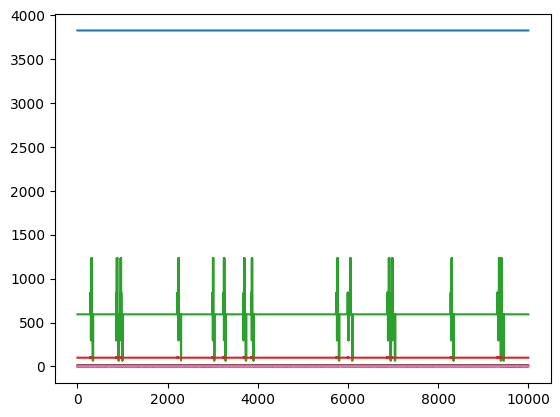

In [25]:
plt.plot(train_data[:10000])
plt.show()